In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [126]:
raw_scheme = pd.read_csv('flights.csv')
raw_scheme.columns = ['Flight','Origin','Destination','1','2','3','4','5','6','7','STD','STA','AddDay']
# raw_scheme.head(3)

In [125]:
# raw_scheme[(raw_scheme['Destination'] == 'BKK') & (raw_scheme['Origin'] == 'SIN') ]
# raw_scheme[(raw_scheme['Destination'] == 'SIN') & (raw_scheme['Origin'] == 'BKK') ]

In [92]:
expand = pd.melt(raw_scheme,id_vars=['Flight','Origin','Destination','STD','STA','AddDay'],value_vars=['1','2','3','4','5','6','7'])
final = expand[expand['value']!='.']

In [112]:
nodes = list(set(final['Origin'].unique().tolist() + final['Destination'].unique().tolist()))
nodes[1]

'CGK'

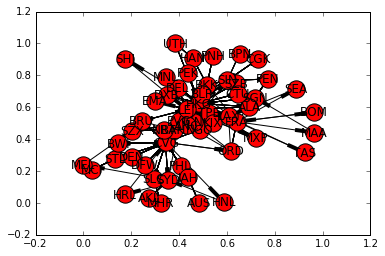

In [133]:
G = nx.MultiDiGraph()
G.add_nodes_from(nodes)
# G.add_node('SIN')
# G.add_node('BKK')

for key,row in final.iterrows():
    G.add_edge(row['Origin'],row['Destination'],flight=row['Flight'],STD=row['STD'],STA=row['STA'])
# G.add_nodes_from(range(100,110))
# H=nx.Graph()
# H.add_path([0,1,2,3,4,5,6,7,8,9])
# G.add_nodes_from(H)
# G.add_node(H)
# G.add_edges_from([(11,21),(11,31)])
# G.add_edges_from([(4,5,dict(route=282)), (4,5,dict(route=37))])
# G.add_edges_from([(14,15,route=282), (14,15,route=37)])

# G[4]

nx.draw_networkx(G)

In [134]:
nx.write_gexf(G,"test.gexf")

In [27]:
g = nx.DiGraph()
g.add_node(17)
g.add_edge(23,48,dow=1)
g.node[17]['ICAO'] = 'SIN'
g.add_edge(77,88,label='hello')

In [6]:
g.node[17]

{'ICAO': 'SIN'}

In [11]:
g.edges(data=True)

[(23, 48, {'dow': 1})]

In [12]:
g[23][48]

{'dow': 1}

In [21]:
g[11][14]['detail'][0]

{'AddDay': '0', 'DOW': 1, 'Flight': '3S110', 'STA': '7:15', 'STD': '11:45'}

In [7]:
17 in g.nodes()

True

In [28]:
# nx.draw_random(g)
# pos=nx.draw_circular(g)
# nx.draw_networkx_labels(g,pos)
nx.write_gexf(g,"test.gexf")

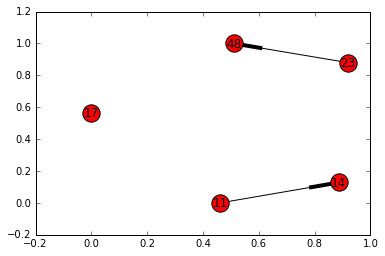

In [23]:
nx.draw_networkx(g)

## Open Flights

In [27]:
route = pd.read_csv('routes.dat',header=0)
airport = pd.read_csv('airports.dat')
airline = pd.read_csv('airlines.dat')

In [30]:
airline_fieldnames = ['id','name','alias','iata','icao','callsign','country','active']
airport_fieldnames = ['id','name','city','country','iata_faa','icao','latitude','longitude'
                      ,'altitude','timezone','dst', 'tz_timezone']
route_fieldnames = ['airline','airline_id','source_airport','source_airport_id','destination_airport','destination_airport_id',
                     'codeshare','stops','equipment']